In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
df = pd.read_excel('Churn for exploration purposes.xlsx')
df.shape


(3321, 21)

In [3]:
df.iloc[0,:] # single record

State                   KS
Account Length         128
Area Code              415
Phone             382-4657
Int'l Plan              no
VMail Plan             yes
VMail Message           25
Day Mins             265.1
Day Calls              110
Day Charge           45.07
Eve Mins             197.4
Eve Calls               99
Eve Charge           16.78
Night Mins           244.7
Night Calls             91
Night Charge         11.01
Intl Mins             10.0
Intl Calls               3
Intl Charge            2.7
CustServ Calls           1
Churn?              False.
Name: 0, dtype: object

In [4]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3321 non-null   object 
 1   Account Length  3321 non-null   int64  
 2   Area Code       3321 non-null   int64  
 3   Phone           3321 non-null   object 
 4   Int'l Plan      3321 non-null   int64  
 5   VMail Plan      3321 non-null   int64  
 6   VMail Message   3321 non-null   int64  
 7   Day Mins        3321 non-null   float64
 8   Day Calls       3321 non-null   int64  
 9   Day Charge      3321 non-null   float64
 10  Eve Mins        3321 non-null   float64
 11  Eve Calls       3321 non-null   int64  
 12  Eve Charge      3321 non-null   float64
 13  Night Mins      3321 non-null   float64
 14  Night Calls     3321 non-null   int64  
 15  Night Charge    3321 non-null   float64
 16  Intl Mins       3321 non-null   float64
 17  Intl Calls      3321 non-null   i

Data Preprocess

In [17]:
# making Int'l Plan yes as 1 and no as 0
df["Int'l Plan"] = df["Int'l Plan"].apply(lambda x: 1 if x=='yes' else 0)

# making VMail Plan yes as 1 and no as 0
df["VMail Plan"] = df["VMail Plan"].apply(lambda x: 1 if x=='yes' else 0) 

# remane column name
df = df.rename(columns={'Churn?':'Churn'}) 
df["Area Code"] = df["Area Code"]
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3317,WV,68,415,370-3271,0,0,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3318,RI,28,510,328-8230,0,0,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3319,CT,184,510,364-6381,1,0,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [7]:

df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='True.' else 0)  # making churn true as 1 and false as 0

Count total null/NA/empty values

In [8]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

Count total no. of records which are duplicates

In [9]:
df.duplicated().sum()

0

##### Co-relation found:
        between Day Charge & Day Mins
        between Eve Charge & Eve Mins
        between Night Charge & Night Mins
        between International Charge & International Mins

In [10]:
# find any co-relation between columns if present
df.corr(numeric_only=True)

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
Account Length,1.000000,-0.011953,0.024686,0.003450,-0.004109,0.004899,0.039246,0.004897,-0.006508,0.019815,-0.006496,-0.008538,-0.015708,-0.008542,0.010611,0.020743,0.010649,-0.002846,0.016504
Area Code,-0.011953,1.000000,0.048642,-0.001452,-0.002848,-0.008650,-0.008554,-0.008650,0.003285,-0.010970,0.003310,-0.005443,0.015392,-0.005462,-0.018156,-0.023949,-0.018262,0.027607,0.007683
Int'l Plan,0.024686,0.048642,1.000000,0.005724,0.008490,0.049379,0.003740,0.049382,0.019625,0.005716,0.019631,-0.029563,0.012730,-0.029570,0.046035,0.017519,0.045945,-0.023991,0.261010
VMail Plan,0.003450,-0.001452,0.005724,1.000000,0.956827,-0.002302,-0.011320,-0.002304,0.021297,-0.005722,0.021309,0.006895,0.016668,0.006880,-0.001980,0.007871,-0.001940,-0.016163,-0.101361
VMail Message,-0.004109,-0.002848,0.008490,0.956827,1.000000,0.000196,-0.009530,0.000193,0.017370,-0.005052,0.017385,0.008413,0.008063,0.008395,0.002306,0.014188,0.002333,-0.011641,-0.088923
Day Mins,0.004899,-0.008650,0.049379,-0.002302,0.000196,1.000000,0.007762,1.000000,0.005310,0.015558,0.005297,0.005220,0.021920,0.005196,-0.009286,0.007282,-0.009226,-0.012237,0.206310
Day Calls,0.039246,-0.008554,0.003740,-0.011320,-0.009530,0.007762,1.000000,0.007764,-0.020701,0.004488,-0.020699,0.023668,-0.019124,0.023658,0.020318,0.005687,0.020417,-0.017168,0.018888
Day Charge,0.004897,-0.008650,0.049382,-0.002304,0.000193,1.000000,0.007764,1.000000,0.005318,0.015558,0.005304,0.005221,0.021920,0.005197,-0.009288,0.007280,-0.009228,-0.012240,0.206310
Eve Mins,-0.006508,0.003285,0.019625,0.021297,0.017370,0.005310,-0.020701,0.005318,1.000000,-0.009989,1.000000,-0.011587,0.006528,-0.011599,-0.011382,0.000248,-0.011421,-0.015875,0.092003
Eve Calls,0.019815,-0.010970,0.005716,-0.005722,-0.005052,0.015558,0.004488,0.015558,-0.009989,1.000000,-0.009982,-0.003142,0.009445,-0.003102,0.010974,0.017234,0.010940,0.003267,0.008737


Mathematical parameters



In [11]:
df.describe()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.00000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000
mean,101.075881,437.183077,0.097260,0.277025,8.110208,179.80003,100.437218,30.566543,200.908491,100.139416,17.077431,200.966245,100.093044,9.043559,10.236646,4.478470,2.764405,1.560373,0.144535
std,39.833195,42.371751,0.296356,0.447596,13.695128,54.42873,20.048068,9.252868,50.658378,19.907637,4.305957,50.592707,19.556777,2.276723,2.792041,2.463022,0.753828,1.313295,0.351684
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.70000,87.000000,24.430000,166.600000,87.000000,14.160000,167.100000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.40000,101.000000,30.500000,201.300000,100.000000,17.110000,201.300000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.60000,114.000000,36.820000,235.300000,114.000000,20.000000,235.400000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.80000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Using Countplot

In [12]:
df['Churn'].value_counts()

0    2841
1     480
Name: Churn, dtype: int64

<AxesSubplot: >

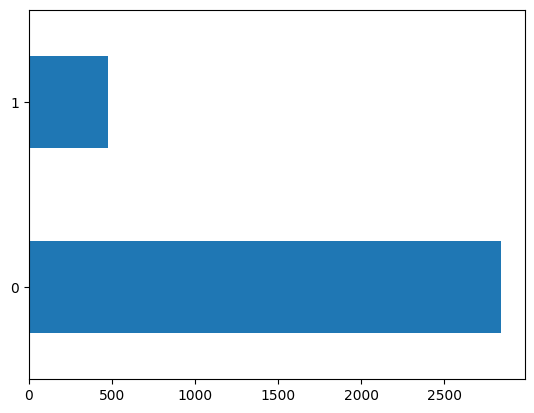

In [13]:
# sns.countplot(df['Churn'])

df['Churn'].value_counts().plot(kind='barh')
